# Assignment Lab 4 - Nicolas Duboc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab4_functions import initinter41,rk4ODEinter41,derivsinter41,midpointinter41

# Problem Embedded

In [2]:
def RK5(coeffs,y,tstep):
    k1 = coeff.dt * derivsinter41(coeff,y,tstep)
    k2 = coeff.dt * derivsinter41(coeff,y+((1/5)*k1),tstep+((1/5)*coeffs.dt))
    k3 = coeff.dt * derivsinter41(coeff,y+((3/40)*k1)+((9/40)*k2),tstep+((3/10)*coeffs.dt))
    k4 = coeff.dt * derivsinter41(coeff,y+((3/10)*k1)-((9/10)*k2)+((6/5)*k3),tstep+((3/5)*coeffs.dt))
    k5 = coeff.dt * derivsinter41(coeff,y-((11/54)*k1)+((5/2)*k2)-((70/27)*k3)+((35/27)*k4),tstep+(coeffs.dt))
    k6 = coeff.dt * derivsinter41(coeff,y+((1631/55296)*k1)+((175/512)*k2)+((575/13824)*k3)+((44275/110592)*k4)+((253/4096)*k5),tstep+((7/8)*coeffs.dt))
    y_n1 = y +((37/378)*k1)+((250/621)*k3)+((125/594)*k4)+((512/1771)*k6)
    return y_n1


    

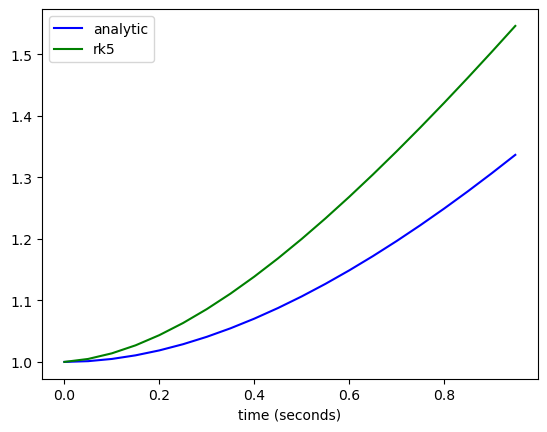

In [8]:
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.1,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,0.05)
nsteps=len(timeVec)
yrk4=[]
yrk5=[]
yrk4.append(coeff.yinitial)
yrk5.append(coeff.yinitial)

tsteps = [coeff.dt,coeff.dt*0.5,coeff.dt] #list of different time steps

for i in np.arange(1,nsteps):
    yrk4_new=rk4ODEinter41(coeff,yrk4[i-1],timeVec[i-1])
    yrk4.append(yrk4_new)
    yrk5_new=RK5(coeff,yrk5[i-1],timeVec[i-1])
    yrk5.append(yrk5_new)

analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,yrk5,'g-',label='rk5')
#l3=theAx.plot(timeVec,yrk4,'m-',label='rk4')
theAx.legend(loc='best')

In [4]:
analytic

array([1.        , 1.00122942, 1.00483742, 1.01070798, 1.01873075,
       1.02880078, 1.04081822, 1.05468809, 1.07032005, 1.08762815,
       1.10653066, 1.12694981, 1.14881164, 1.17204578, 1.1965853 ,
       1.22236655, 1.24932896, 1.27741493, 1.30656966, 1.33674102])

In [6]:
analytic

array([1.        , 1.00483742, 1.01873075, 1.04081822, 1.07032005,
       1.10653066, 1.14881164, 1.1965853 , 1.24932896, 1.30656966])

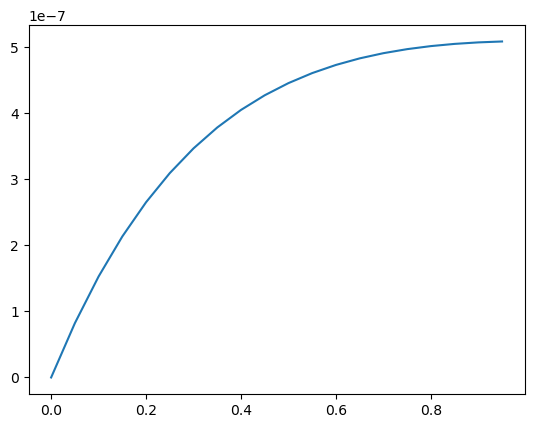

In [57]:
diff_est = np.subtract(yrk4,yrk5)
plt.plot(timeVec,diff_est)

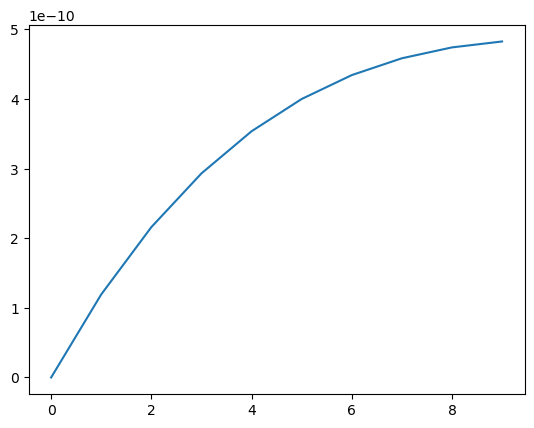

In [51]:
glob_err = abs(np.subtract(analytic,yrk5))
plt.plot(glob_err)

# Coding Problem B

In [12]:
def HR(coeffs,y,nsteps):
    k1 = coeffs.dt*derivsinter41(coeffs,y,nsteps)
    k2 = coeffs.dt*derivsinter41(coeffs,y+((2/3)*k1),nsteps+((2/3)*coeffs.dt))
    y_n1 = y +(1/4)*k1 + (3/4)*k2
    return y_n1
    

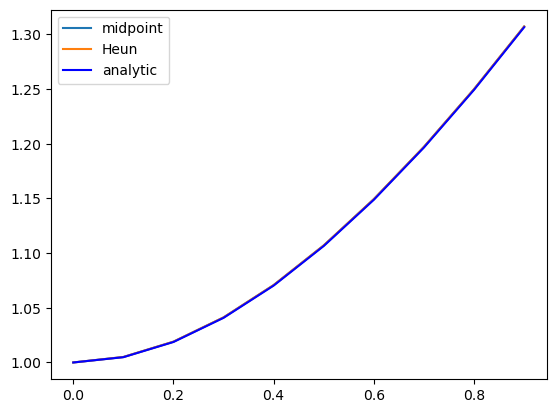

In [13]:
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
init1 = 1
init2 = 0.2
ym1 = []
yh1 = []
ym1.append(init1)
yh1.append(init1)
for i in range(1,nsteps):
    ym_new = midpointinter41(coeff,ym1[i-1],timeVec[i-1])
    ym1.append(ym_new)
    yh_new = HR(coeff,yh1[i-1],timeVec[i-1])
    yh1.append(yh_new)
analytic=timeVec + np.exp(-timeVec)
fig,ax = plt.subplots(1,1)
ax.plot(timeVec,ym1,label='midpoint')
ax.plot(timeVec,yh1,label='Heun')
ax.plot(timeVec,analytic,'b-',label='analytic')
ax.legend(loc='best')

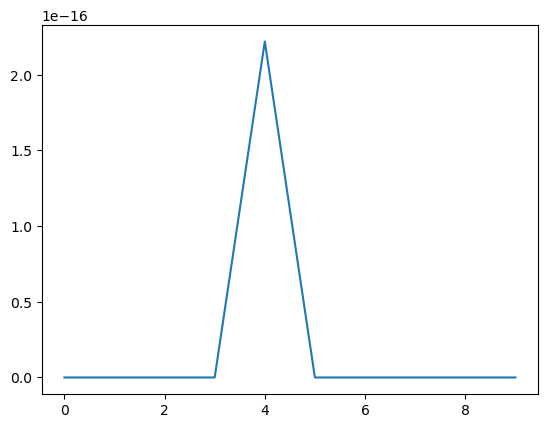

In [14]:
diff = np.subtract(ym1,yh1)
plt.plot(diff)

# Problem Coding C

In [43]:
def deriv_temp(Temp,Ta,lam):
    # print(Temp)
    return lam*(Temp - Ta)

def RK4(T,Ta,lam,dt):
    k1 = dt * deriv_temp(T,Ta,lam)
    k2 = dt * deriv_temp(T+ (0.5 * k1),Ta,lam)
    k3 = dt * deriv_temp(T+ (0.5 * k2),Ta,lam)
    k4 = dt * deriv_temp(T+ k3,Ta,lam)
    Tn1 = T + (1.0/6.0) * (k1 + (2.0 * k2) + (2.0 * k3) + k4)
    return Tn1

In [46]:
Ta = 20
T0 = 30
lam = -0.8 #?
dt = 0.1
timeVec = np.arange(0,1,dt)
nstep = len(timeVec)
T = []
T.append(T0)
# deriv_temp(T[0],Ta,lam)
for i in range(1,nstep):
    Tn1 = RK4(T[i-1],Ta,lam,dt)
    T.append(Tn1)
analytic = Ta + (T0-Ta)*np.exp(lam*timeVec)

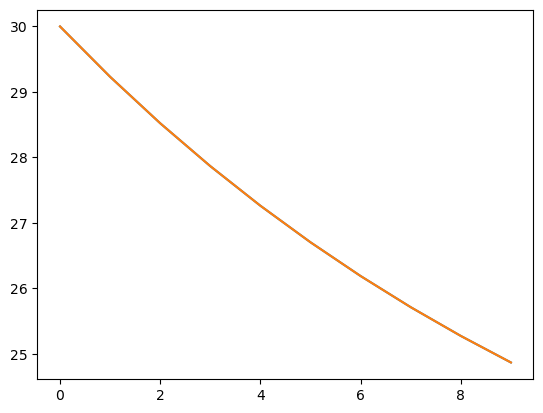

In [47]:
plt.plot(T)
plt.plot(analytic)